## Required Modules Installation

Make sure to install the following modules before running the project:
```bash
!pip install basemap


# Load dataset from local .csv

In [46]:
import pandas as pd

df = pd.read_csv('Dataset Gempa Bumi (in).csv', sep=';')

In [47]:
df

tgl        ot  lat    lon  depth  mag  \
0      01/11/2008  21:02:43 -918  11906     10   49   
1      01/11/2008  20:58:50 -655  12964     10   46   
2      01/11/2008  17:43:13 -701  10663    121   37   
3      01/11/2008  16:24:15 -330  12785     10   32   
4      01/11/2008  16:20:37 -641  12954     70   43   
...           ...       ...  ...    ...    ...  ...   
92882  26/01/2023  02:25:09  324  12718     10   40   
92883  26/01/2023  02:15:04  270  12710     10   39   
92884  26/01/2023  01:57:09 -783  12107     10   38   
92885  26/01/2023  01:46:21  300  12716     10   41   
92886  26/01/2023  00:00:35 -887  11895     10   24   

                           remark  strike1  dip1  rake1  strike2  dip2  rake2  
0        Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
1                       Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
2                Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
3               Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
4                       Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
...                           ...      ...   ...    ...      ...   ...    ...  
92882  Talaud Islands - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
92883        Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN    NaN  
92884                  Flores Sea      NaN   NaN    NaN      NaN   NaN    NaN  
92885        Northern Molucca Sea      NaN   NaN    NaN      NaN   NaN    NaN  
92886  Sumbawa Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  

[92887 rows x 13 columns]

In [48]:
df.dtypes

tgl         object
ot          object
lat          int64
lon          int64
depth        int64
mag          int64
remark      object
strike1    float64
dip1       float64
rake1      float64
strike2    float64
dip2       float64
rake2      float64
dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  int64  
 3   lon      92887 non-null  int64  
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  int64  
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.2+ MB


## Conver Lat and Long

In [50]:
latitude = df['lat'] / 100
longitude = df['lon'] / 100

## Peta sebaran gempar di sekitar Indonesia beserta kedalaman gempa dan magnitude

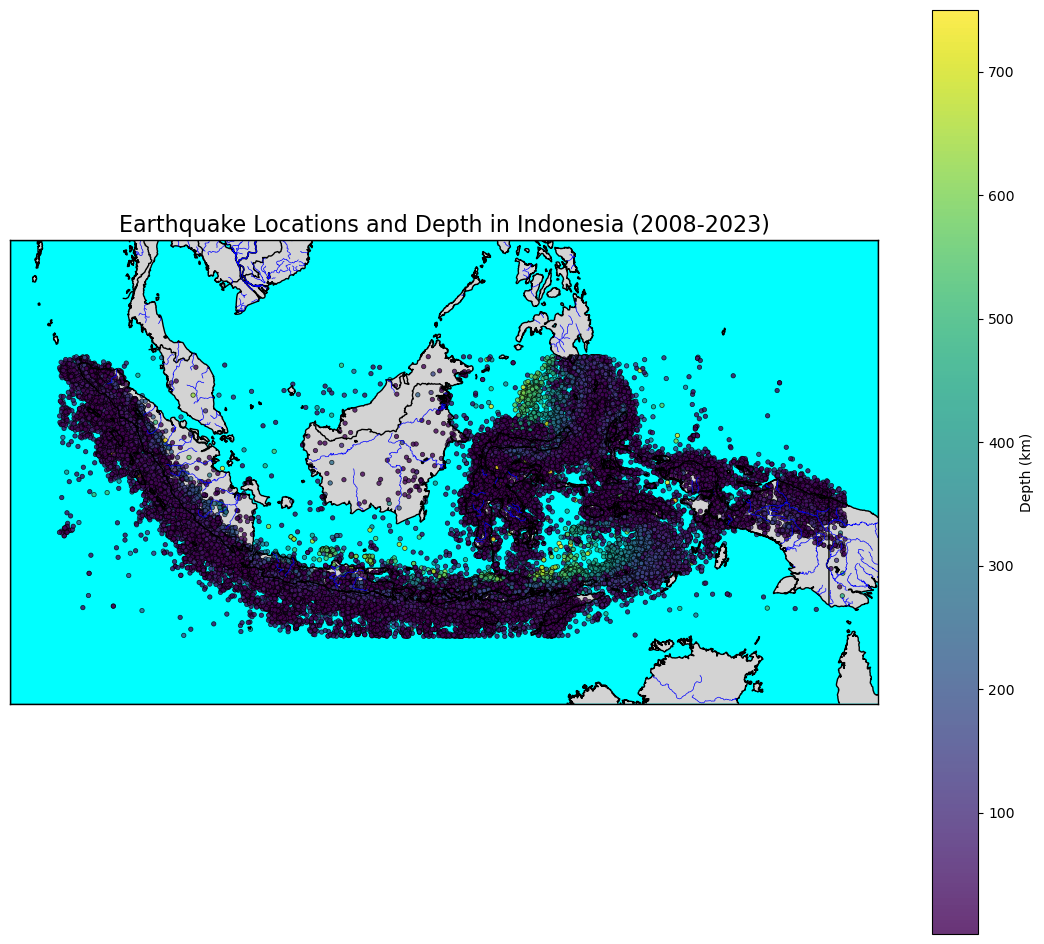

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(14, 12))


m = Basemap(projection='merc', 
            llcrnrlat=-15, urcrnrlat=13,   # Latitude range: more accurately covering Indonesia
            llcrnrlon=91, urcrnrlon=144,   # Longitude range: more accurately covering Indonesia
            resolution='i')  

m.drawcoastlines(linewidth=1.0)
m.drawcountries(linewidth=1.0)
m.drawrivers(linewidth=0.5, color='blue')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')


x, y = m(longitude.values, latitude.values)


sc = m.scatter(x, y, c=df['depth'], cmap='viridis', marker='o', s=10, alpha=0.8, edgecolors="k", linewidth=0.5)
plt.colorbar(sc, label='Depth (km)')


plt.title('Earthquake Locations and Depth in Indonesia (2008-2023)', fontsize=16)

# Show the plot
plt.show()


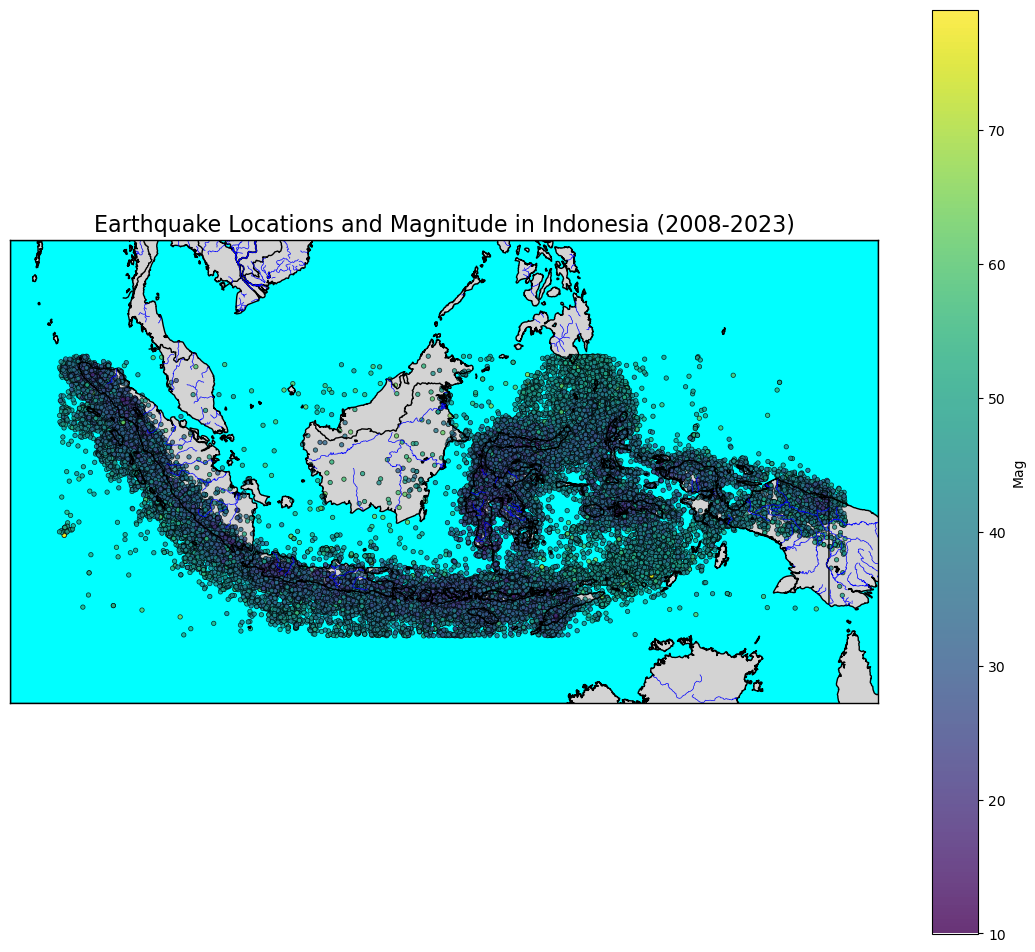

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


plt.figure(figsize=(14, 12))


m = Basemap(projection='merc', 
            llcrnrlat=-15, urcrnrlat=13,   # Latitude range: more accurately covering Indonesia
            llcrnrlon=91, urcrnrlon=144,   # Longitude range: more accurately covering Indonesia
            resolution='i')  

m.drawcoastlines(linewidth=1.0)
m.drawcountries(linewidth=1.0)
m.drawrivers(linewidth=0.5, color='blue')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')


x, y = m(longitude.values, latitude.values)


sc = m.scatter(x, y, c=df['mag'], cmap='viridis', marker='o', s=10, alpha=0.8, edgecolors="k", linewidth=0.5)
plt.colorbar(sc, label='Mag')


plt.title('Earthquake Locations and Magnitude in Indonesia (2008-2023)', fontsize=16)

# Show the plot
plt.show()


## Frekuensi gempa di Indonesia dan sekitar berdasarkan Lokasi

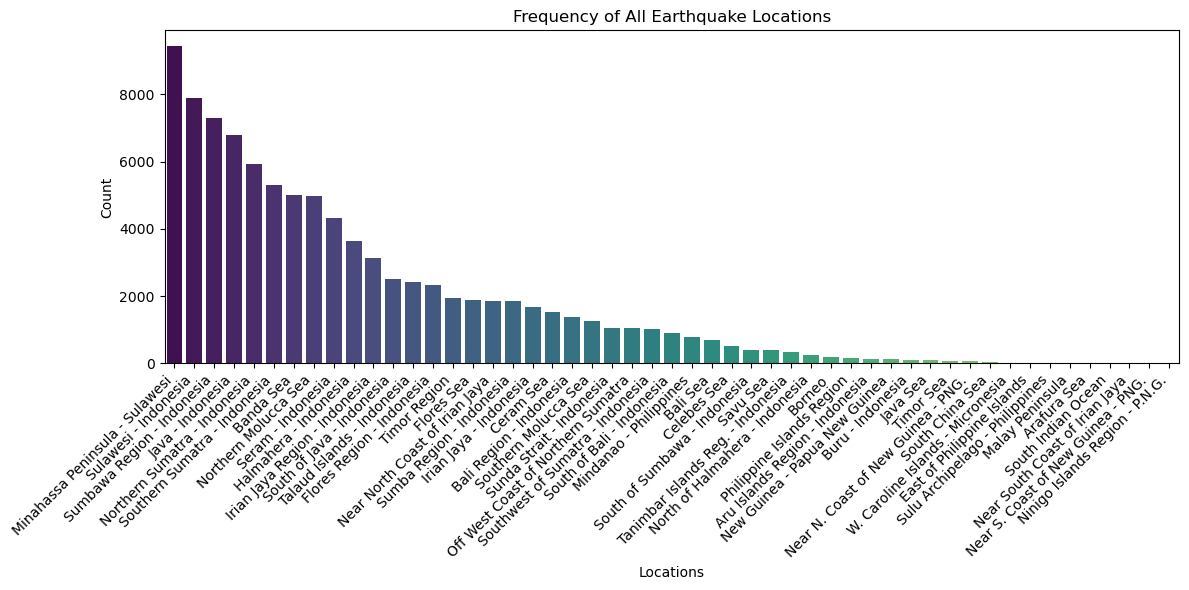

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

remark_counts = df['remark'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=remark_counts.index, y=remark_counts.values, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Locations')
plt.ylabel('Count')
plt.title('Frequency of All Earthquake Locations')

plt.tight_layout()
plt.show()

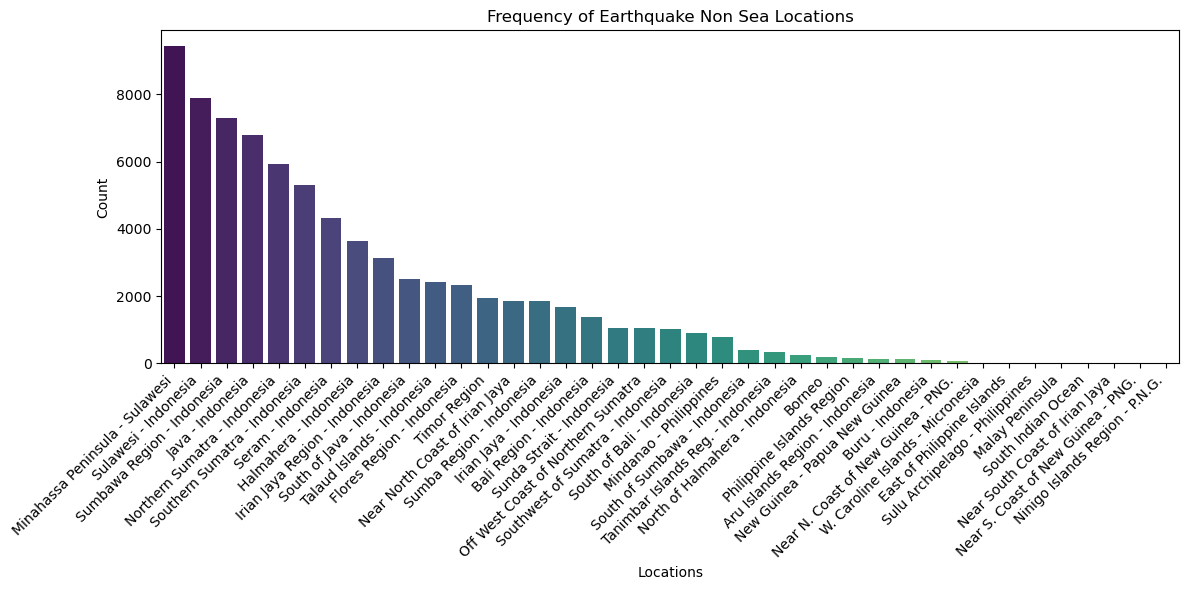

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_filtered = df[~df['remark'].str.contains('sea', case=False, na=False)]

remark_counts = df_filtered['remark'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=remark_counts.index, y=remark_counts.values, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Locations')
plt.ylabel('Count')
plt.title('Frequency of Earthquake Non Sea Locations')

plt.tight_layout()
plt.show()


## Distribusi gempa berdasarkan kedalaman dan magnitude

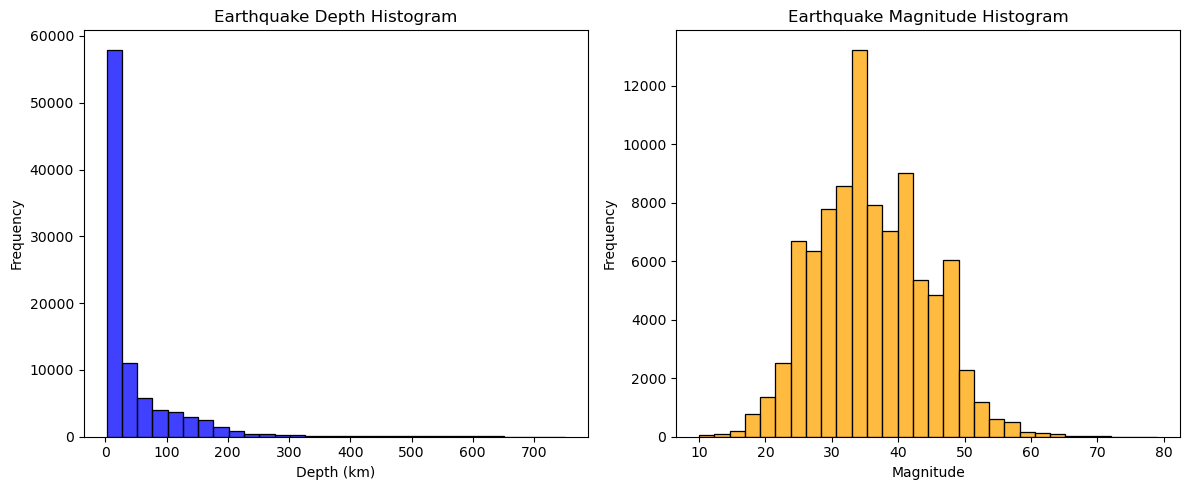

In [55]:
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['depth'], bins=30,  color='blue')
plt.title('Earthquake Depth Histogram')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(df['mag'], bins=30, color='orange')
plt.title('Earthquake Magnitude Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


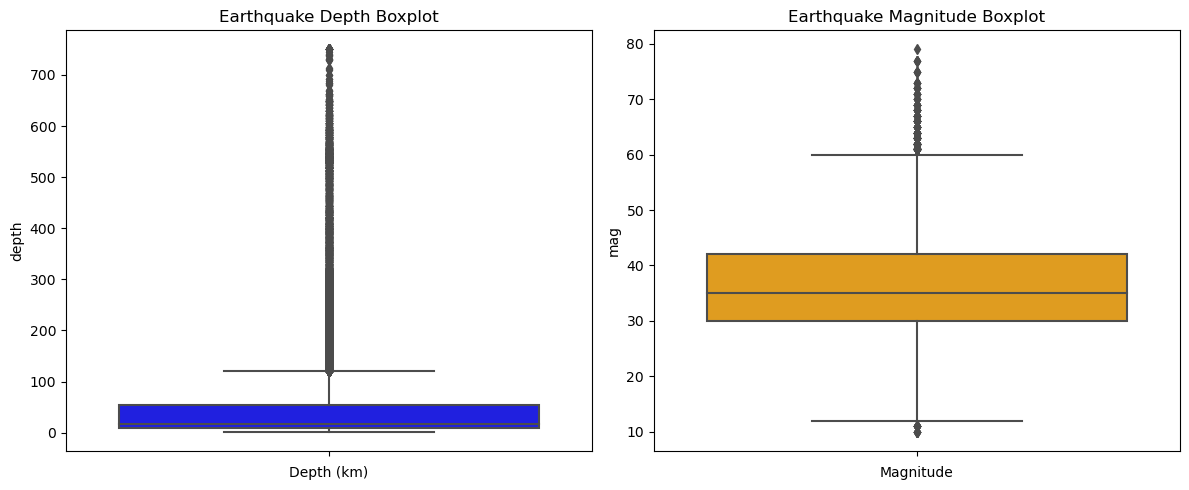

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['depth'], color='blue')
plt.title('Earthquake Depth Boxplot')
plt.xlabel('Depth (km)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['mag'], color='orange')
plt.title('Earthquake Magnitude Boxplot')
plt.xlabel('Magnitude')

plt.tight_layout()
plt.show()


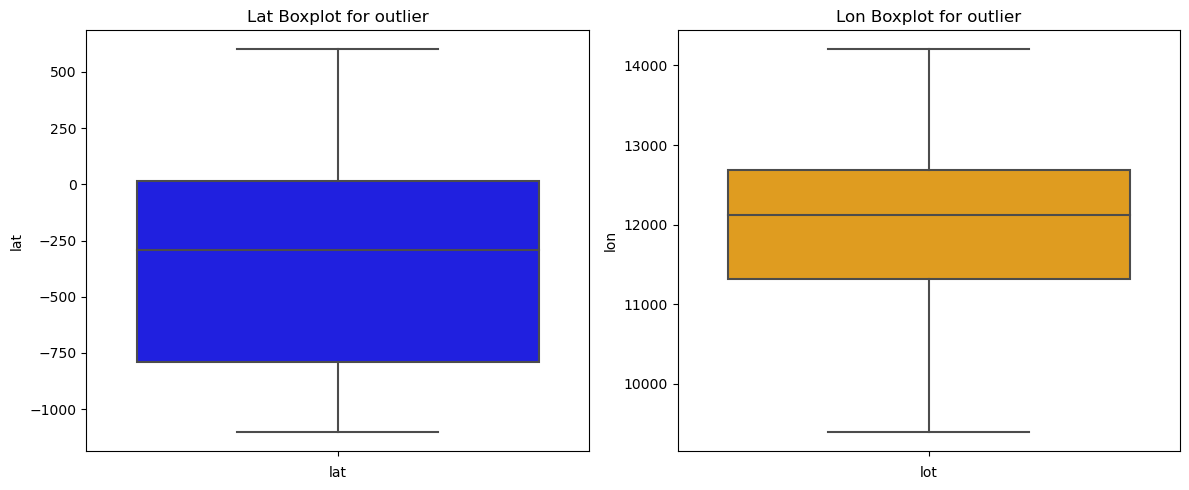

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['lat'], color='blue')
plt.title('Lat Boxplot for outlier')
plt.xlabel('lat')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['lon'], color='orange')
plt.title('Lon Boxplot for outlier')
plt.xlabel('lot')

plt.tight_layout()
plt.show()


In [58]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

for col in ['lat', 'lon']:
    df = remove_outliers_iqr(df, col)

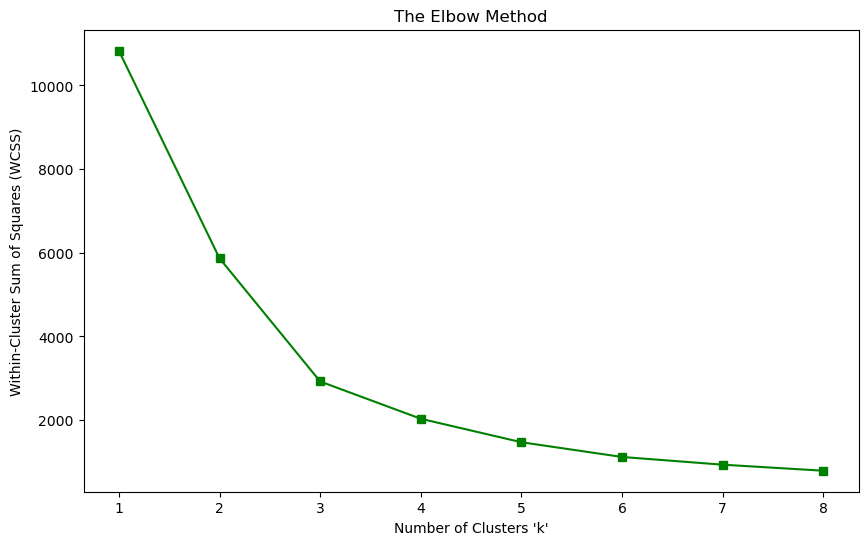

Silhouette Score: 0.5645976974419243


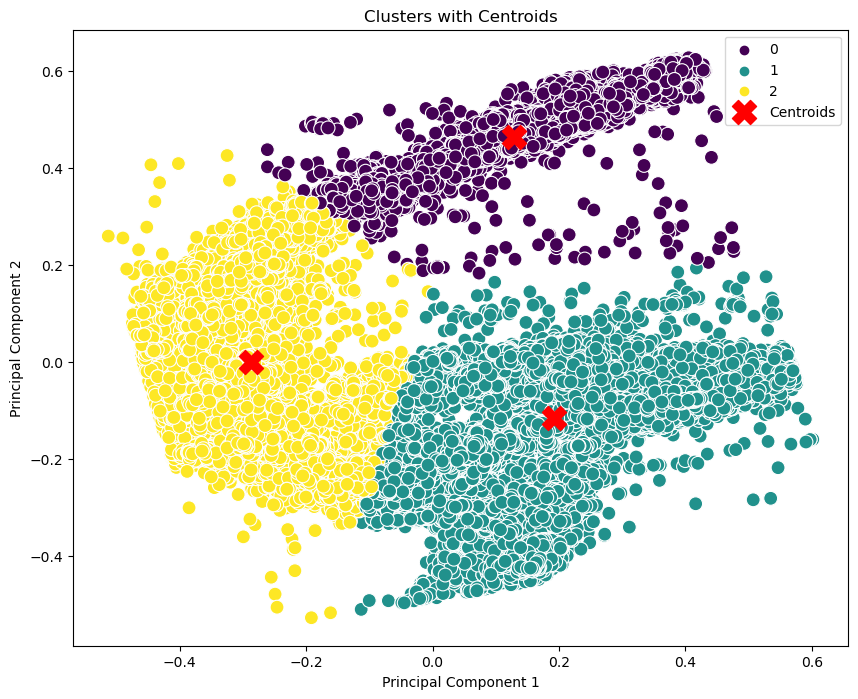

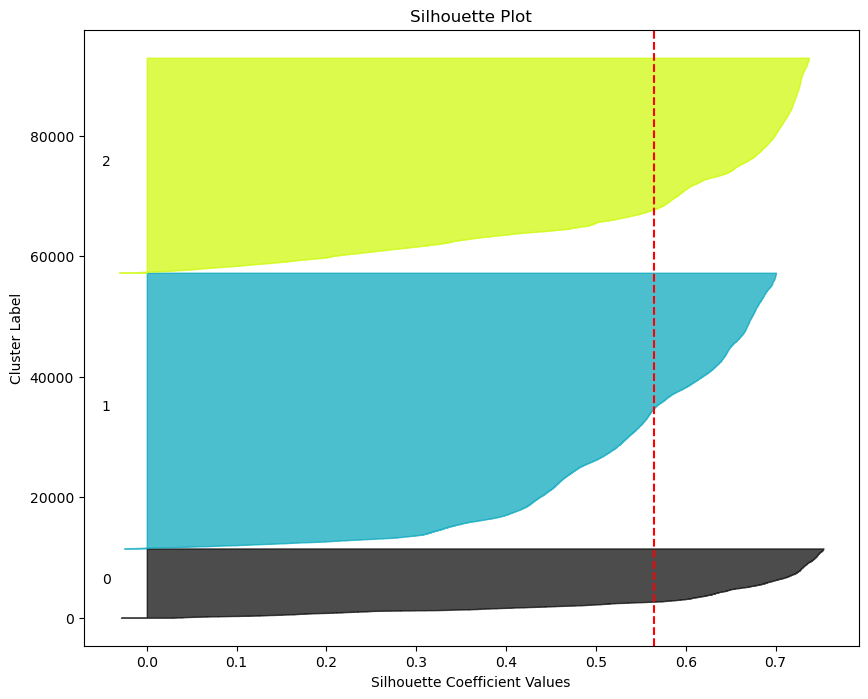

In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples



coordinates = df[['lat', 'lon']]

# Scale the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(coordinates)


# Elbow method to find the optimal number of clusters
wcss = {}
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss[i] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel("Number of Clusters 'k'")
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('The Elbow Method')
plt.show()

# Define the number of clusters from the elbow method
n_clusters = 3  # Adjust based on your observation from the elbow plot

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

# Add clusters to the data
df['Cluster_KMeans'] = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Add principal components to DataFrame
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plot the clusters and centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_KMeans', data=df, palette='viridis', s=100)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Silhouette plot
fig, ax = plt.subplots(figsize=(10, 8))
silhouette_values = silhouette_samples(scaled_features, kmeans.labels_)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

Silhouette Score (Fuzzy C-Means): 0.40174318085142213

K-Means Metrics:
Homogeneity: 0.2773
Completeness: 0.9087
V-Measure: 0.4249

Fuzzy C-Means Metrics:
Homogeneity: 0.2947
Completeness: 0.8670
V-Measure: 0.4399


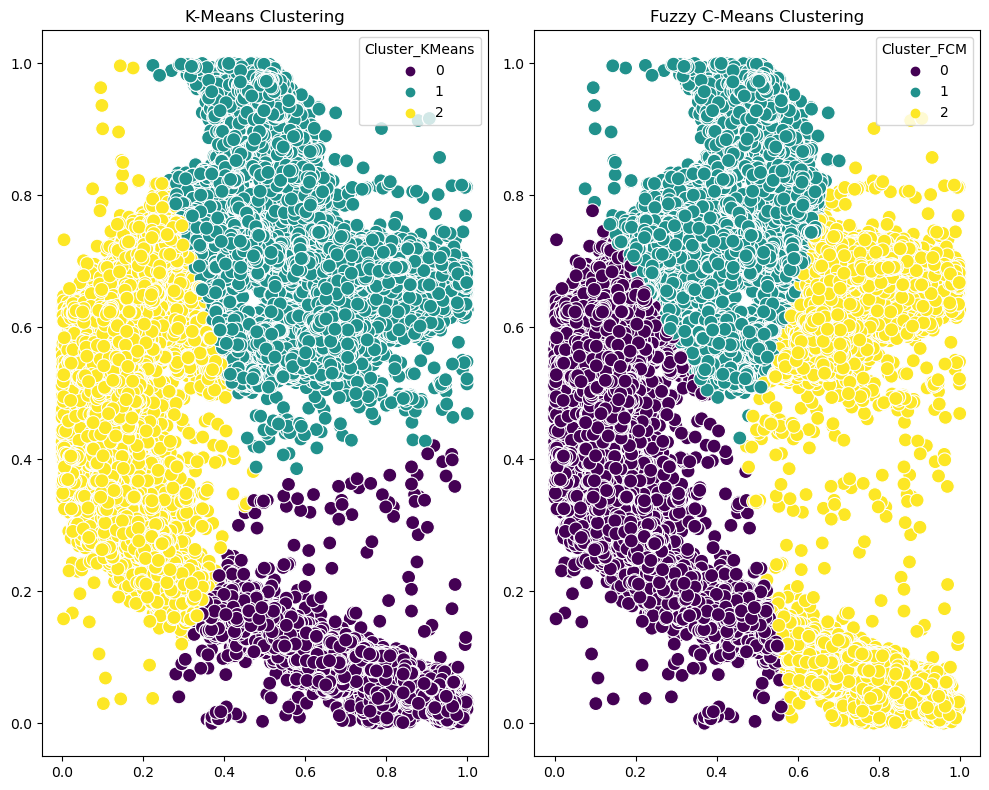

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score
import matplotlib.pyplot as plt
import seaborn as sns
from fcmeans import FCM



# Tentukan jumlah klaster
n_clusters = 3


# 2. Fuzzy C-Means
# Fuzzy C-Means clustering
fcm = FCM(n_clusters=n_clusters)
fcm.fit(scaled_features)
df['Cluster_FCM'] = np.argmax(fcm.u, axis=1)  # Ambil klaster dengan probabilitas terbesar

# Menghitung silhouette score untuk Fuzzy C-Means
silhouette_fcm = silhouette_score(scaled_features, df['Cluster_FCM'])
print(f'Silhouette Score (Fuzzy C-Means): {silhouette_fcm}')

# 3. Homogeneity, Completeness, and V-Measure

# Misalnya, kita gunakan 'remark' sebagai ground truth untuk perbandingan
# Pastikan kolom 'remark' sudah ada dalam DataFrame dan merupakan label sebenarnya
homogeneity_kmeans = homogeneity_score(df['remark'], df['Cluster_KMeans'])
completeness_kmeans = completeness_score(df['remark'], df['Cluster_KMeans'])
v_measure_kmeans = v_measure_score(df['remark'], df['Cluster_KMeans'])

homogeneity_fcm = homogeneity_score(df['remark'], df['Cluster_FCM'])
completeness_fcm = completeness_score(df['remark'], df['Cluster_FCM'])
v_measure_fcm = v_measure_score(df['remark'], df['Cluster_FCM'])

print(f'\nK-Means Metrics:')
print(f'Homogeneity: {homogeneity_kmeans:.4f}')
print(f'Completeness: {completeness_kmeans:.4f}')
print(f'V-Measure: {v_measure_kmeans:.4f}')

print(f'\nFuzzy C-Means Metrics:')
print(f'Homogeneity: {homogeneity_fcm:.4f}')
print(f'Completeness: {completeness_fcm:.4f}')
print(f'V-Measure: {v_measure_fcm:.4f}')

# Visualisasi Hasil Clustering
plt.figure(figsize=(10, 8))

# Plot untuk K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Cluster_KMeans'], palette='viridis', s=100)
plt.title('K-Means Clustering')

# Plot untuk Fuzzy C-Means
plt.subplot(1, 2, 2)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['Cluster_FCM'], palette='viridis', s=100)
plt.title('Fuzzy C-Means Clustering')

plt.tight_layout()
plt.show()


## KMeans Cluster Insight

In [64]:
# Group by cluster and calculate descriptive statistics
descriptive_stats = df.groupby('Cluster_KMeans').agg({
    'depth': ['mean', 'median', 'std', 'count'],
    'mag': ['mean', 'median', 'std', 'count']
})

In [65]:
descriptive_stats.T.round(1)

Cluster_KMeans        0        1        2
depth mean         38.3     45.0     57.6
      median       18.0     13.0     19.0
      std          50.7     69.8     90.2
      count     11492.0  45733.0  35662.0
mag   mean         36.8     36.3     35.2
      median       36.0     36.0     34.0
      std           8.2      8.3      8.4
      count     11492.0  45733.0  35662.0

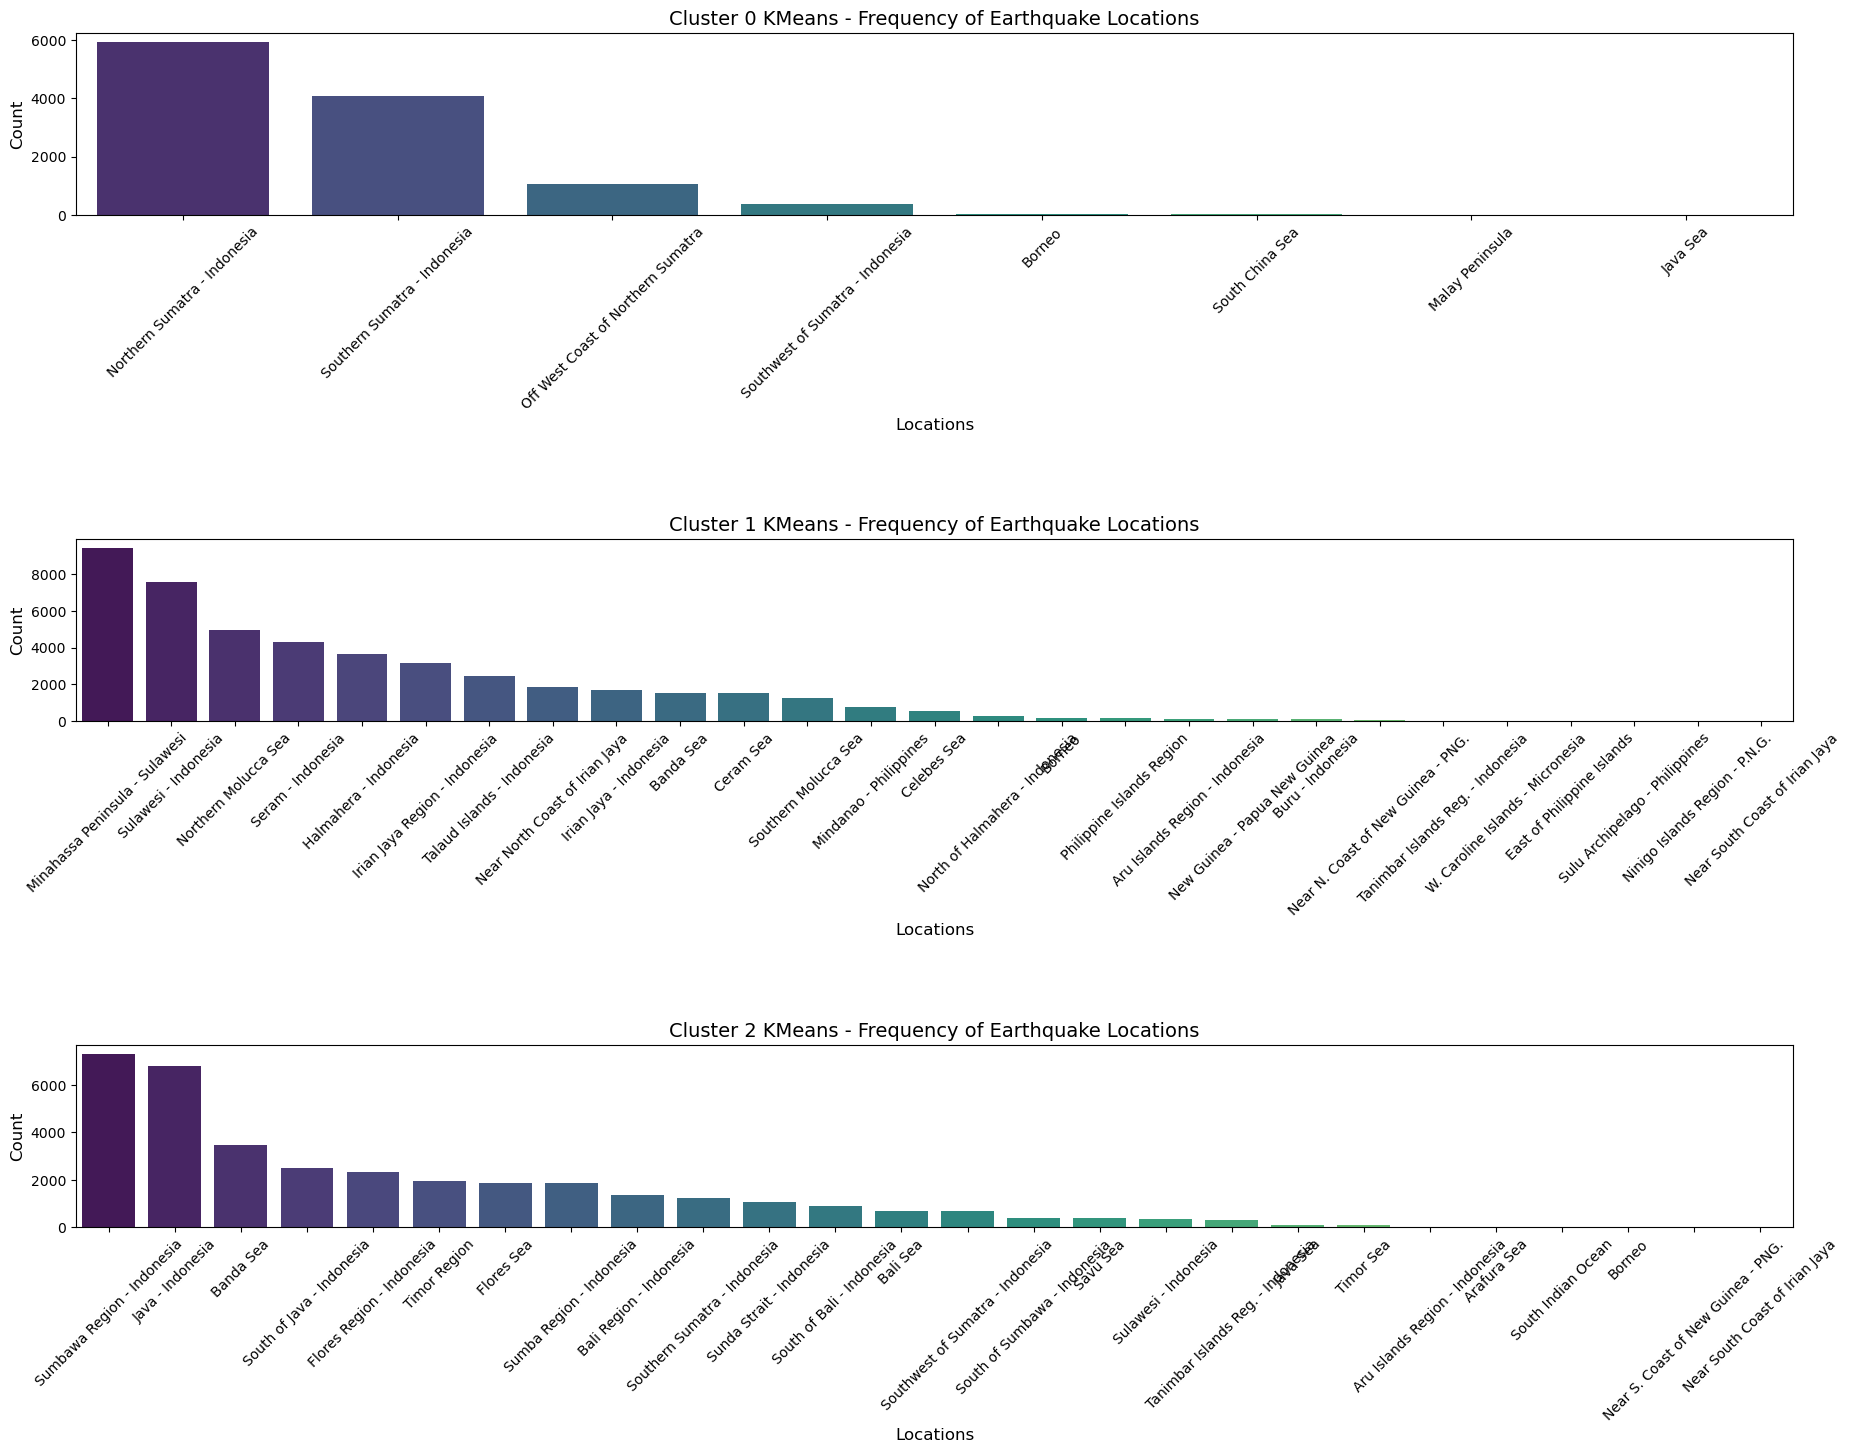

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with 3 subplots (one per cluster), arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(20, 16), sharex=False)

# Loop through each cluster and plot a barplot for each cluster's 'remark' values
for cluster in [0, 1, 2]:
    # Filter the data for the specific cluster
    cluster_data = df[df['Cluster_KMeans'] == cluster]
    
    # Get the count of 'remark' values for the current cluster
    remark_counts = cluster_data['remark'].value_counts().reset_index()
    remark_counts.columns = ['remark', 'count']  # Rename columns for clarity
    
    # Plot the data
    sns.barplot(x='remark', y='count', data=remark_counts, palette='viridis', ax=axes[cluster])
    
    # Set the title and axis labels
    axes[cluster].set_title(f'Cluster {cluster} KMeans - Frequency of Earthquake Locations', fontsize=14)
    axes[cluster].set_xlabel('Locations', fontsize=12)
    axes[cluster].set_ylabel('Count', fontsize=12)
    axes[cluster].tick_params(axis='x', rotation=45, labelsize=10)

# Adjust layout to ensure plots are properly spaced
plt.tight_layout(pad=6.0)  # Increase padding for better spacing between subplots
plt.show()


## FCM Cluster Insight

In [68]:
# Group by cluster and calculate descriptive statistics
descriptive_stats_FCM = df.groupby('Cluster_FCM').agg({
    'depth': ['mean', 'median', 'std', 'count'],
    'mag': ['mean', 'median', 'std', 'count']
})

In [69]:
descriptive_stats_FCM.T.round(1)

Cluster_FCM         0        1        2
depth mean       45.3     49.9     52.2
      median     17.0     12.0     19.0
      std        75.5     82.0     74.0
      count   35064.0  24197.0  33626.0
mag   mean       34.6     36.8     36.7
      median     34.0     36.0     36.0
      std         8.0      8.7      8.2
      count   35064.0  24197.0  33626.0

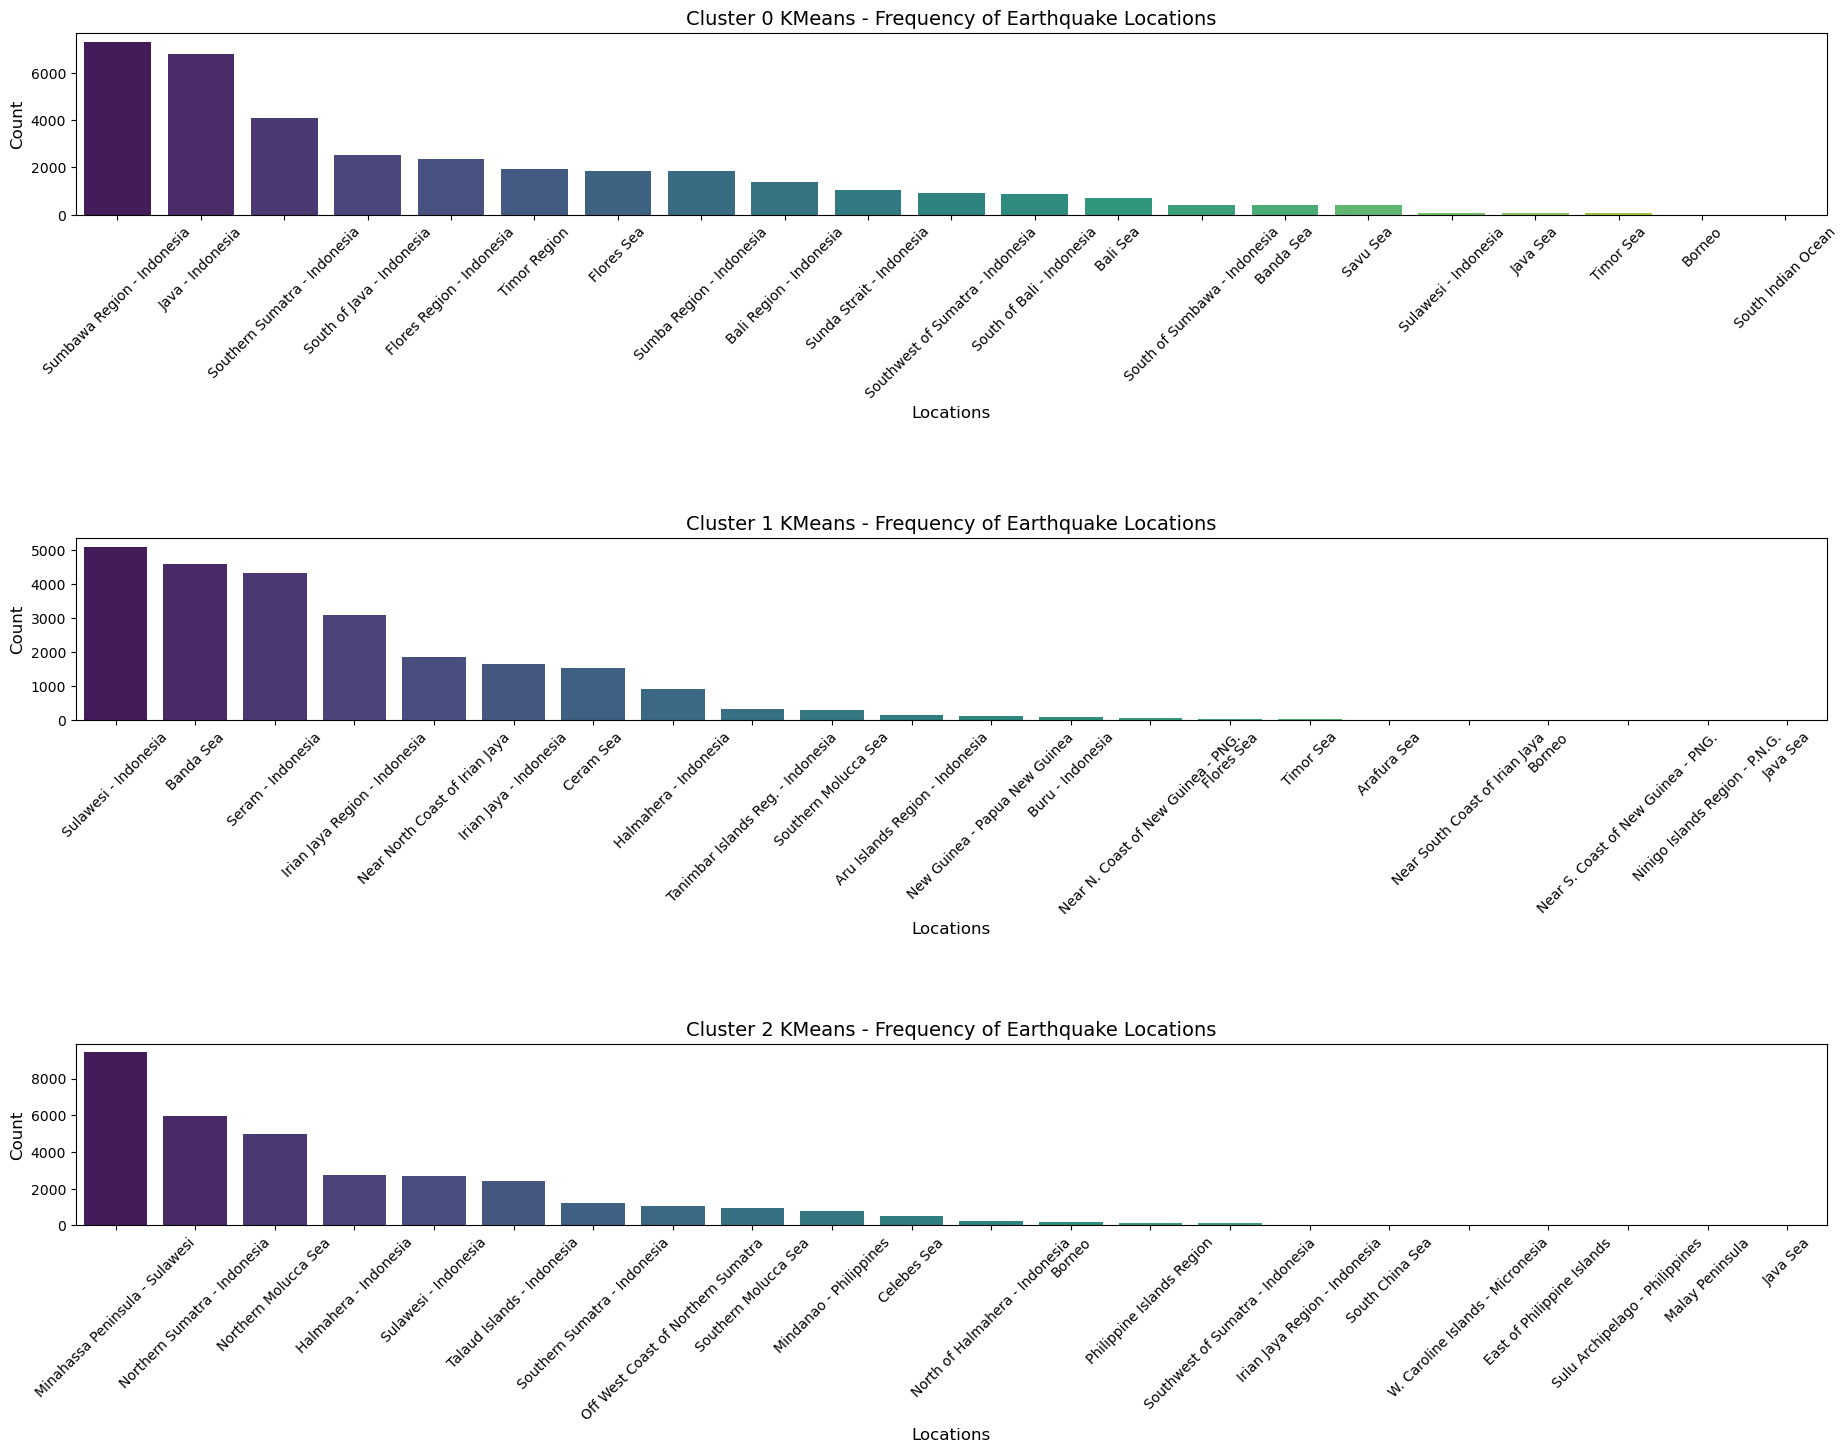

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with 3 subplots (one per cluster), arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(20, 16), sharex=False)

# Loop through each cluster and plot a barplot for each cluster's 'remark' values
for cluster in [0, 1, 2]:
    # Filter the data for the specific cluster
    cluster_data = df[df['Cluster_FCM'] == cluster]
    
    # Get the count of 'remark' values for the current cluster
    remark_counts = cluster_data['remark'].value_counts().reset_index()
    remark_counts.columns = ['remark', 'count']  # Rename columns for clarity
    
    # Plot the data
    sns.barplot(x='remark', y='count', data=remark_counts, palette='viridis', ax=axes[cluster])
    
    # Set the title and axis labels
    axes[cluster].set_title(f'Cluster {cluster} FCM - Frequency of Earthquake Locations', fontsize=14)
    axes[cluster].set_xlabel('Locations', fontsize=12)
    axes[cluster].set_ylabel('Count', fontsize=12)
    axes[cluster].tick_params(axis='x', rotation=45, labelsize=10)

# Adjust layout to ensure plots are properly spaced
plt.tight_layout(pad=6.0)  # Increase padding for better spacing between subplots
plt.show()
